In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [3]:
# Define and Compile the Neural Network
model = tf.keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd', loss='mean_squared_error')

# Providing the data
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Training the Neural Network
model.fit(xs, ys, epochs=500)

# Predict using a NumPy array
print(model.predict(np.array([10.0])))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 10.2627
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.2866
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.7276
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.4968
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.5242
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.7549
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.1457
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.6625
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.2784
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.9725
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.7281
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 1.5322
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.3746
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.2470
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.1433
Epoch 16/500
1/1 

# Hands-On Computer Vision

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0

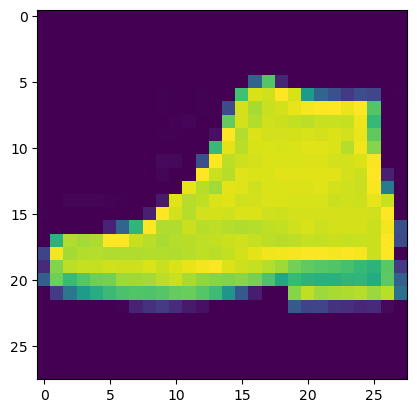

In [5]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

np.set_printoptions(linewidth=200)
plt.imshow(training_images[42])
print(training_labels[42])
print(training_images[42])

#training_images = training_images/255.0
#test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    #tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

## CallBacks

In [6]:
class MyCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if logs.get('loss') < 0.4:
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True


callbacks = MyCallBack()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
training_labels = training_labels / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131
Reached 60% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0130


In [17]:
# from os import path, getcwd

# # import tensorflow as tf

# # path = f"{getcwd()}\\mnist.npz"

# # print(path)

# class StopTrainingCaLLback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         if logs is None:
#             logs = {}
#         if logs.get('acc') >= 0.99:
#             print('\nReached desired accuracy (0.99), No more training.')
#             self.model.stop_training = True


# def train_mnist():
#     mCallBack = StopTrainingCaLLback()
#     nmist = tf.keras.datasets.mnist
#     # (x_train, y_train), (x_test, y_test) = nmist.load_data(path=path)
#     # (x_train, y_train), (x_test, y_test) = nmist.load_data(cache_dir=getcwd())
#     with np.load(path) as data:
#         x_train, y_train = data['x_train'], data['y_train']
#         x_test, y_test = data['x_test'], data['y_test']
#     x_train = x_train / 255.0
#     x_test = x_test / 255.0
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(512, activation=tf.nn.relu),
#         tf.keras.layers.Dense(10, activation=tf.nn.softmax)
#     ])
#     model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['acc'])
#     history = model.fit(x_train, y_train, epochs=10, callbacks=[mCallBack])
#     return history.epoch, history.history['acc'][-1]


# train_mnist()

In [16]:
import tensorflow as tf
import numpy as np
from os import getcwd

# Use full path to the local mnist.npz file
path = f"{getcwd()}\\mnist.npz"

class StopTrainingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if logs.get('acc') >= 0.99:
            print('\nReached desired accuracy (0.99), stopping training.')
            self.model.stop_training = True

def train_mnist():
    mCallback = StopTrainingCallback()

    # Load local MNIST file
    with np.load(path) as data:
        x_train, y_train = data['x_train'], data['y_train']
        x_test, y_test = data['x_test'], data['y_test']

    # Normalize data
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Build model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

    history = model.fit(x_train, y_train, epochs=10, callbacks=[mCallback])
    return history.epoch, history.history['acc'][-1]

train_mnist()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.8996 - loss: 0.3467
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9760 - loss: 0.0812
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9849 - loss: 0.0498
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9892 - loss: 0.0348
Epoch 5/10
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9922 - loss: 0.0248
Reached desired accuracy (0.99), stopping training.
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9922 - loss: 0.0248


([0, 1, 2, 3, 4], 0.9911999702453613)

# FashionMnistDNN

In [18]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7808 - loss: 0.6291
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - accuracy: 0.8610 - loss: 0.3878
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.8775 - loss: 0.3359
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.8844 - loss: 0.3127
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - accuracy: 0.8888 - loss: 0.2966
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8736 - loss: 0.3498


# FashionMnistCNN

In [19]:
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  #tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

2.18.1


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8193 - loss: 0.5045
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9049 - loss: 0.2600
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9242 - loss: 0.2049
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9354 - loss: 0.1750
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9487 - loss: 0.1394
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9140 - loss: 0.2515


In [20]:
from os import path, getcwd
# Use full path to the local mnist.npz file
path = f"{getcwd()}\\mnist.npz"

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if logs.get('acc') >= 0.998:
            print('\nReached desired accuracy (99.8%), No more training.')
            self.model.stop_training = True


def train_mnist_conv():
    mCallBack = myCallback()
    nmist = tf.keras.datasets.mnist
    # (x_train, y_train), (x_test, y_test) = nmist.load_data(path=path)
    # Load local MNIST file
    with np.load(path) as data:
        x_train, y_train = data['x_train'], data['y_train']
        x_test, y_test = data['x_test'], data['y_test']
    x_train = x_train.reshape(60000,28,28,1)
    x_train = x_train / 255.0
    x_test = x_test.reshape(10000,28,28,1)
    x_test = x_test / 255.0
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])
    history = model.fit(x_train, y_train, epochs=10, callbacks=[mCallBack])
    return history.epoch, history.history['acc'][-1]


train_mnist_conv()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - acc: 0.9257 - loss: 0.2352
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - acc: 0.9869 - loss: 0.0395
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - acc: 0.9948 - loss: 0.0180
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - acc: 0.9965 - loss: 0.0113
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - acc: 0.9971 - loss: 0.0088
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - acc: 0.9978 - loss: 0.0065
Epoch 7/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.9981 - loss: 0.0059
Reached desired accuracy (99.8%), No more training.
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - acc: 0.9981 - loss: 0.0059


([0, 1, 2, 3, 4, 5, 6], 0.998116672039032)